In [1]:
import matplotlib.pyplot as plt
import networkx as nx

#Basic graphing with networkx

#Create a graph
G = nx.Graph()

In [2]:
#Add three nodes: 1, 2, 3
G.add_nodes_from([1,2,3])

In [3]:
#Add an edge from 1 to 2
G.add_edge(1, 2)
#Add an edge from 1 to 3
G.add_edge(1, 3)

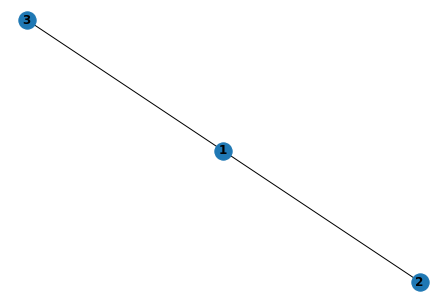

In [4]:
#Draw the graph with labels
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

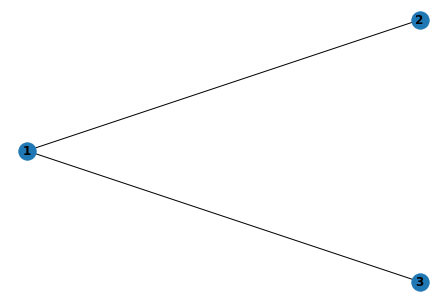

In [5]:
#Create a dictionary which maps each node to a position in the graph
pos = {1: (0, 0),
       2: (1, 1),
       3: (1, -1)}

#Create our graph again
G = nx.Graph()
G.add_nodes_from([1,2,3])
G.add_edge(1, 2)
G.add_edge(1, 3)

#Draw the graph but pass in the positions this time
nx.draw(G, pos=pos, with_labels=True, font_weight='bold')
plt.show()

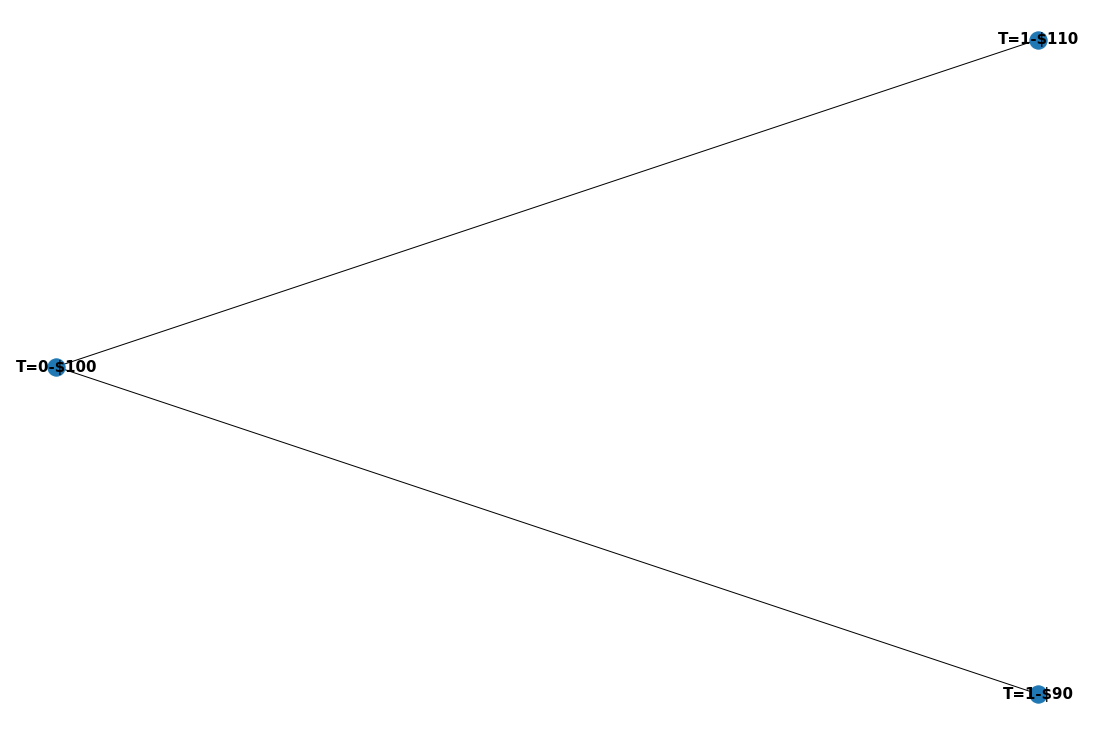

In [6]:
#Repeat this but change the nodes to be the following labels
pos = {"T=0-$100": (0, 0),
       "T=1-$110": (1, 1),
       "T=1-$90": (1, -1)}


G = nx.Graph()
G.add_nodes_from(["T=0-$100", "T=1-$110", "T=1-$90"])
G.add_edge("T=0-$100", "T=1-$110")
G.add_edge("T=0-$100", "T=1-$90")
plt.rcParams["figure.figsize"] = (15,10)
nx.draw(G, pos=pos, with_labels=True, font_weight='bold', font_size=15)


plt.show()

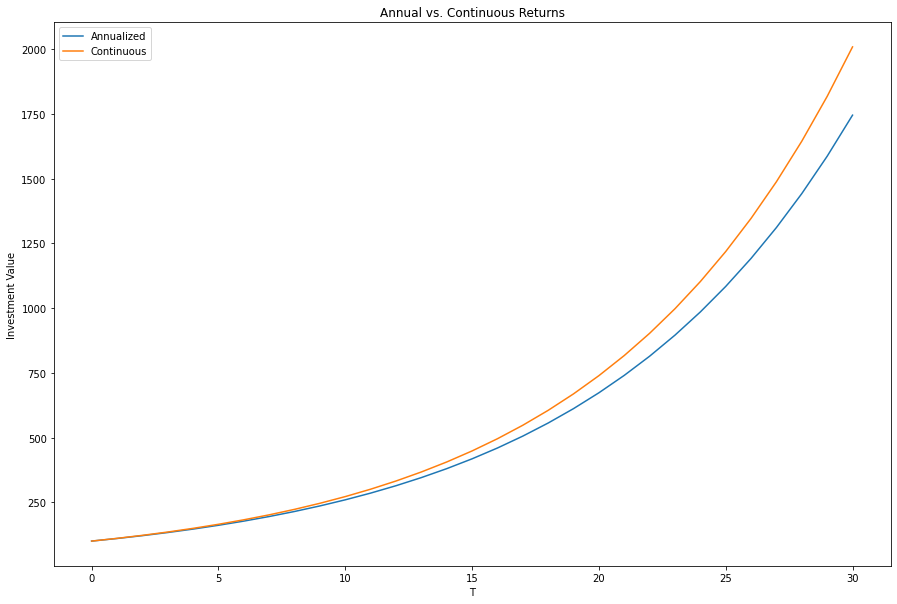

In [7]:
import numpy as np
import pandas as pd

#Compare what the correct continiously compounded rate is
growth = pd.DataFrame(list(range(31)), columns=['Year'])
growth["Annualized"] = 100 * 1.1 ** growth['Year']
growth["Continuous"] = 100 * np.exp(.1 * growth['Year'])
growth = growth.set_index('Year')

growth.plot(kind='line')
plt.xlabel("T")
plt.ylabel("Investment Value")
plt.title("Annual vs. Continuous Returns")
plt.show()

In [8]:
#We can think of a factor that is either multiplied as x or 1/x to a value
up = np.exp(.1)
down = 1/up
print(up)
print(down)

1.1051709180756477
0.9048374180359595


In [9]:
#Print the values
print(100 * up)
print(100 * down)

110.51709180756477
90.48374180359595


In [10]:
#In the first period, you can either go up or down
print([up, down])

[1.1051709180756477, 0.9048374180359595]


In [11]:
#Then in the second period you can go up or down again meaning 4 combinations
#Notice the middle two are the same, the tree by design leads to t+1 combinations
#instead of 2^t because of this behavior
print([up*up, up*down, down*up, down*down])

[1.22140275816017, 1.0, 1.0, 0.8187307530779817]


In [12]:
#We can represent each unique choice as all combinations of up and down where order does not matter
#This is the same kind of thing that a binomial distribution finds
#Let's see what the options are
up = np.exp(.1)
down = 1/up

t = 1
print([(up ** k) * (down ** (t-k))  for k in range(t+1)])
print()

t = 2
print([(up ** k) * (down ** (t-k))  for k in range(t+1)])
print()

t = 3
print([(up ** k) * (down ** (t-k))  for k in range(t+1)])
print()

[0.9048374180359595, 1.1051709180756477]

[0.8187307530779817, 1.0, 1.22140275816017]

[0.7408182206817178, 0.9048374180359595, 1.1051709180756477, 1.3498588075760034]



In [13]:
#Remember how to format string representations of numbers
#The following will display a float with 2 decimals
#Also let's add in a starting stock price S

S = 100
up = np.exp(.1)
down = 1/up

for t in range(4):
    nodes = [S * (up ** k) * (down ** (t-k))  for k in range(t+1)]
    nodes = ["{:.2f}".format(x) for x in nodes]
    print(nodes)

['100.00']
['90.48', '110.52']
['81.87', '100.00', '122.14']
['74.08', '90.48', '110.52', '134.99']


In [14]:
#Let's add in the time period to the string

S = 100
up = np.exp(.1)
down = 1/up

for t in range(4):
    nodes = [S * (up ** k) * (down ** (t-k))  for k in range(t+1)]
    nodes = ["T={}-${:.2f}".format(t, x) for x in nodes]
    print(nodes)

['T=0-$100.00']
['T=1-$90.48', 'T=1-$110.52']
['T=2-$81.87', 'T=2-$100.00', 'T=2-$122.14']
['T=3-$74.08', 'T=3-$90.48', 'T=3-$110.52', 'T=3-$134.99']


In [15]:
#Define a function to build nodes given the starting stock price, the number of periods T
#and the rate for continiously compounded returns r
def create_nodes(S, T, r):
    up = np.exp(r)
    down = 1/up
    node_levels = []
    for t in range(T+1):
        nodes = [S * (up ** k) * (down ** (t-k))  for k in range(t+1)]
        nodes = ["T={}-${:.2f}".format(t, x) for x in nodes]
        node_levels.append(nodes)
    return node_levels
node_levels = create_nodes(100, 3, .1)
print(node_levels)

[['T=0-$100.00'], ['T=1-$90.48', 'T=1-$110.52'], ['T=2-$81.87', 'T=2-$100.00', 'T=2-$122.14'], ['T=3-$74.08', 'T=3-$90.48', 'T=3-$110.52', 'T=3-$134.99']]


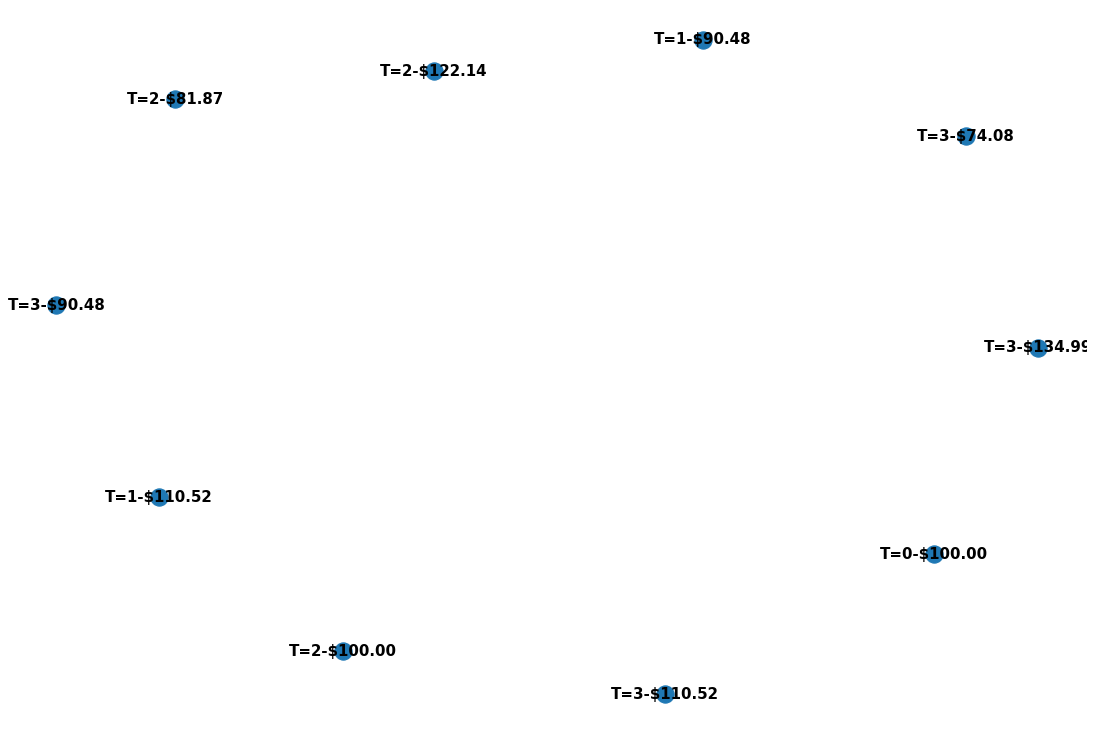

In [16]:
#Build the first steps towards creating a binary tree

def draw_binary_tree(node_levels):
    G = nx.Graph()
    for nodes in node_levels:
        G.add_nodes_from(nodes)
    nx.draw(G, with_labels=True, font_weight='bold', font_size=15)
    plt.show()
draw_binary_tree(node_levels)

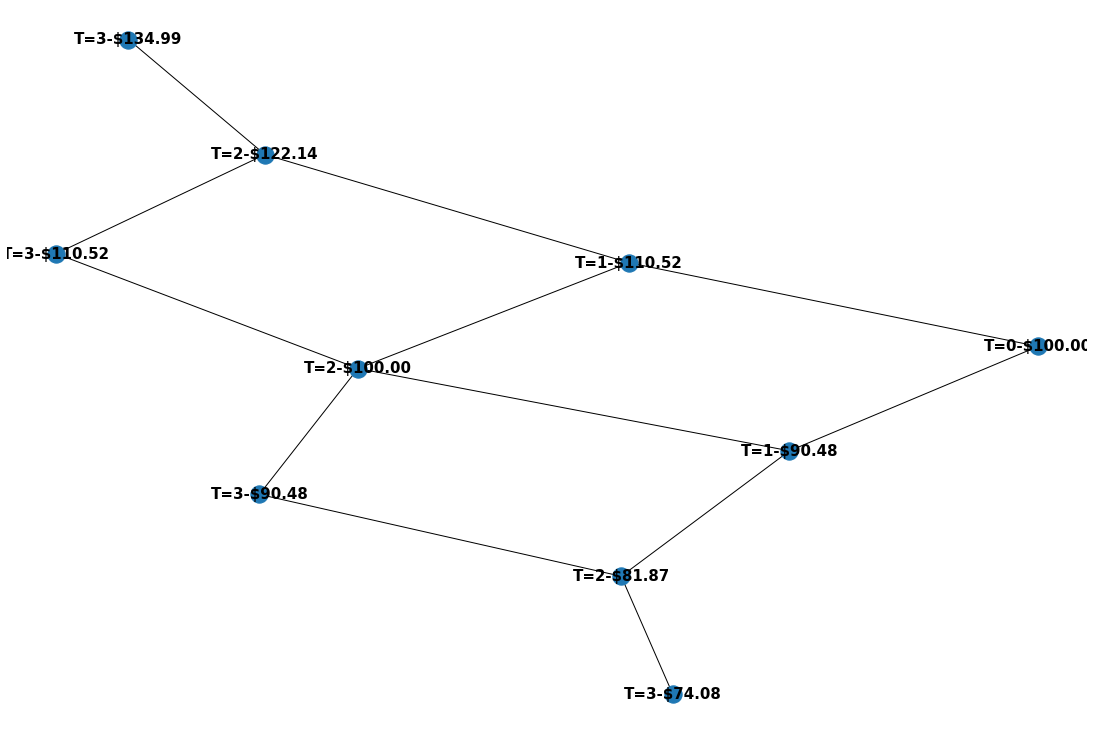

In [17]:
#Update the function to add edges
def draw_binary_tree(node_levels):
    G = nx.Graph()
    #Add the first node
    G.add_nodes_from(node_levels[0])
    
    #Iterate through all the next i-1 levels
    for i in range(len(node_levels)-1):
        #Add the nodes
        G.add_nodes_from(node_levels[i+1])
        
        #Deal with outer nodes, they only can be reached by prior outer nodes
        #Connect the node from the prior level at the lowest position to the lowest position on the current level
        G.add_edge(node_levels[i][0], node_levels[i+1][0])
        #Connect the node from the prior level at the highest position to the highest position on the current level
        G.add_edge(node_levels[i][-1], node_levels[i+1][-1])
        
        #Now we have to go through the remaining nodes (minus the two outer nodes)
        for i2 in range(len(node_levels[i+1])-2):
            #Add the bottom node connection
            G.add_edge(node_levels[i][i2], node_levels[i+1][i2+1])
            #Add the top node connection
            G.add_edge(node_levels[i][i2+1], node_levels[i+1][i2+1])
    nx.draw(G, with_labels=True, font_weight='bold', font_size=15)
    plt.show()
draw_binary_tree(node_levels)

In [18]:
#Now we can define a function that defines the node positions
def create_node_positions(node_levels):
    pos_dictionary = {}
    
    for i in range(len(node_levels)):
        #Define the y positions
        y_positions = [i/2 - x for x in range(i+1)]
        for i2 in range(len(node_levels[i])):
            #Set the positions, they all will have i/2 as the x positions
            pos_dictionary[node_levels[i][i2]] = (i/2, y_positions[i2])
    return pos_dictionary
pos_dictionary = create_node_positions(node_levels)
print(pos_dictionary)

{'T=0-$100.00': (0.0, 0.0), 'T=1-$90.48': (0.5, 0.5), 'T=1-$110.52': (0.5, -0.5), 'T=2-$81.87': (1.0, 1.0), 'T=2-$100.00': (1.0, 0.0), 'T=2-$122.14': (1.0, -1.0), 'T=3-$74.08': (1.5, 1.5), 'T=3-$90.48': (1.5, 0.5), 'T=3-$110.52': (1.5, -0.5), 'T=3-$134.99': (1.5, -1.5)}


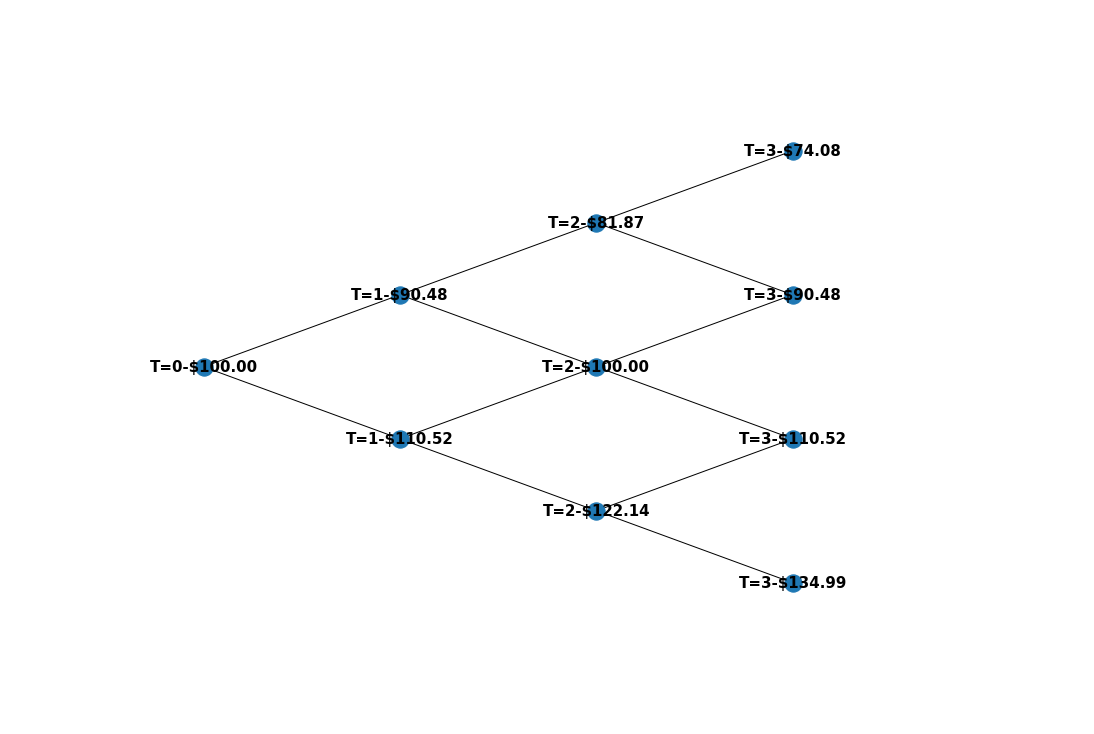

In [19]:
def draw_binary_tree(node_levels, pos_dictionary):
    G = nx.Graph()
    G.add_nodes_from(node_levels[0])
    for i in range(len(node_levels)-1):
        G.add_nodes_from(node_levels[i+1])
        G.add_edge(node_levels[i][0], node_levels[i+1][0])
        G.add_edge(node_levels[i][-1], node_levels[i+1][-1])
        for i2 in range(len(node_levels[i+1])-2):
            G.add_edge(node_levels[i][i2], node_levels[i+1][i2+1])
            G.add_edge(node_levels[i][i2+1], node_levels[i+1][i2+1])
    #Add in the position dictionary
    nx.draw(G, pos=pos_dictionary, with_labels=True, font_weight='bold', font_size=15)
    #Add in axis limits so we can see everything
    plt.xlim([-.5,.25+.5*len(node_levels)])
    plt.ylim([-.5-.5*len(node_levels),.5+.5*len(node_levels)])
    plt.show()
node_levels = create_nodes(100, 3, .1)
pos_dictionary = create_node_positions(node_levels)
draw_binary_tree(node_levels, pos_dictionary)

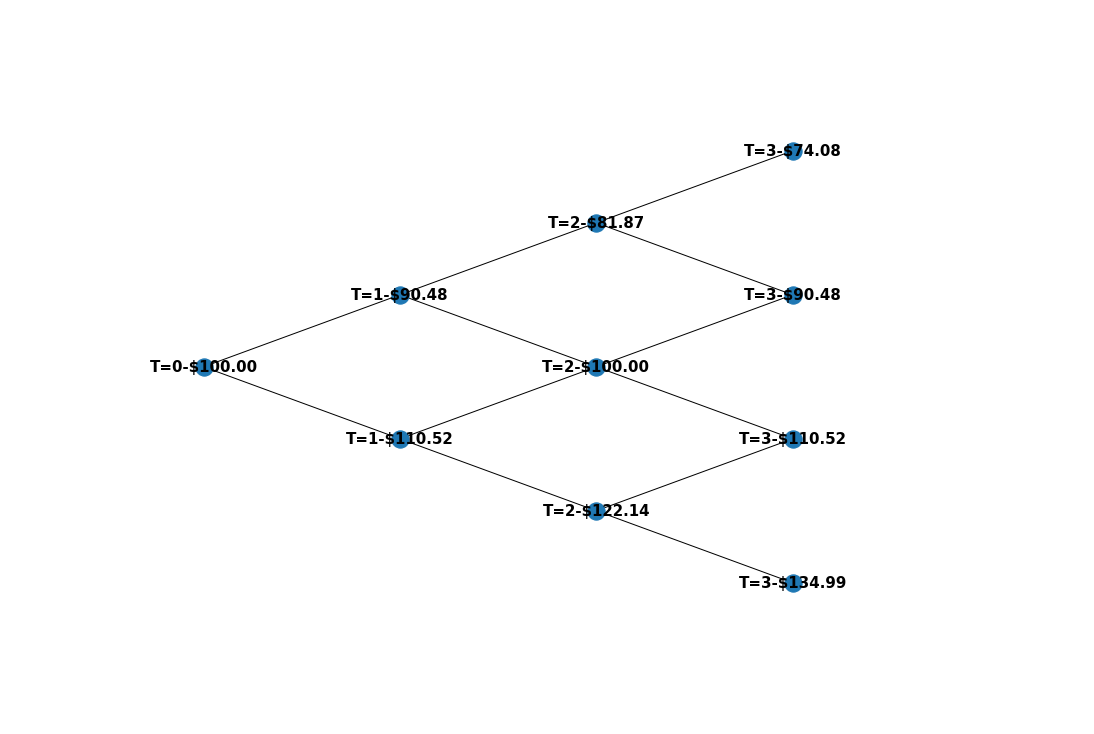

In [20]:
#Clean up the code a bit

def create_nodes(S, T, r):
    up = np.exp(r)
    down = 1/up
    node_levels = []
    for t in range(T+1):
        nodes = [S * (up ** k) * (down ** (t-k))  for k in range(t+1)]
        nodes = ["T={}-${:.2f}".format(t, x) for x in nodes]
        node_levels.append(nodes)
    return node_levels

def create_node_positions(node_levels):
    pos_dictionary = {}
    
    for i in range(len(node_levels)):
        y_positions = [i/2 - x for x in range(i+1)]
        for i2 in range(len(node_levels[i])):
            pos_dictionary[node_levels[i][i2]] = (i/2, y_positions[i2])
    return pos_dictionary


#Separate a function that adds the edges

def draw_nodes_edges(G, node_levels):
    G.add_nodes_from(node_levels[0])
    for i in range(len(node_levels)-1):
        G.add_nodes_from(node_levels[i+1])
        G.add_edge(node_levels[i][0], node_levels[i+1][0])
        G.add_edge(node_levels[i][-1], node_levels[i+1][-1])
        for i2 in range(len(node_levels[i+1])-2):
            G.add_edge(node_levels[i][i2], node_levels[i+1][i2+1])
            G.add_edge(node_levels[i][i2+1], node_levels[i+1][i2+1])

def draw_binary_tree(node_levels, pos_dictionary):
    G = nx.Graph()
    draw_nodes_edges(G, node_levels)
    nx.draw(G, pos=pos_dictionary, with_labels=True, font_weight='bold', font_size=15)
    plt.xlim([-.5,.25+.5*len(node_levels)])
    plt.ylim([-.5-.5*len(node_levels),.5+.5*len(node_levels)])
    plt.show()

node_levels = create_nodes(100, 3, .1)
pos_dictionary = create_node_positions(node_levels)
draw_binary_tree(node_levels, pos_dictionary)

In [21]:
#An issue with using this method for binomial trees is that we can't have different nodes with the same label
#So if two labels were T=2-$0 there would not be two nodes but one
#We can fix this by manually choosing labels, but see what happens otherwise
#For example, if we only wanted it to be the time labels....

node_levels = create_nodes(100, 3, .1)
for i in range(len(node_levels)):
    node_levels[i] = [x[:3] for x in node_levels[i]]
print(node_levels)

[['T=0'], ['T=1', 'T=1'], ['T=2', 'T=2', 'T=2'], ['T=3', 'T=3', 'T=3', 'T=3']]


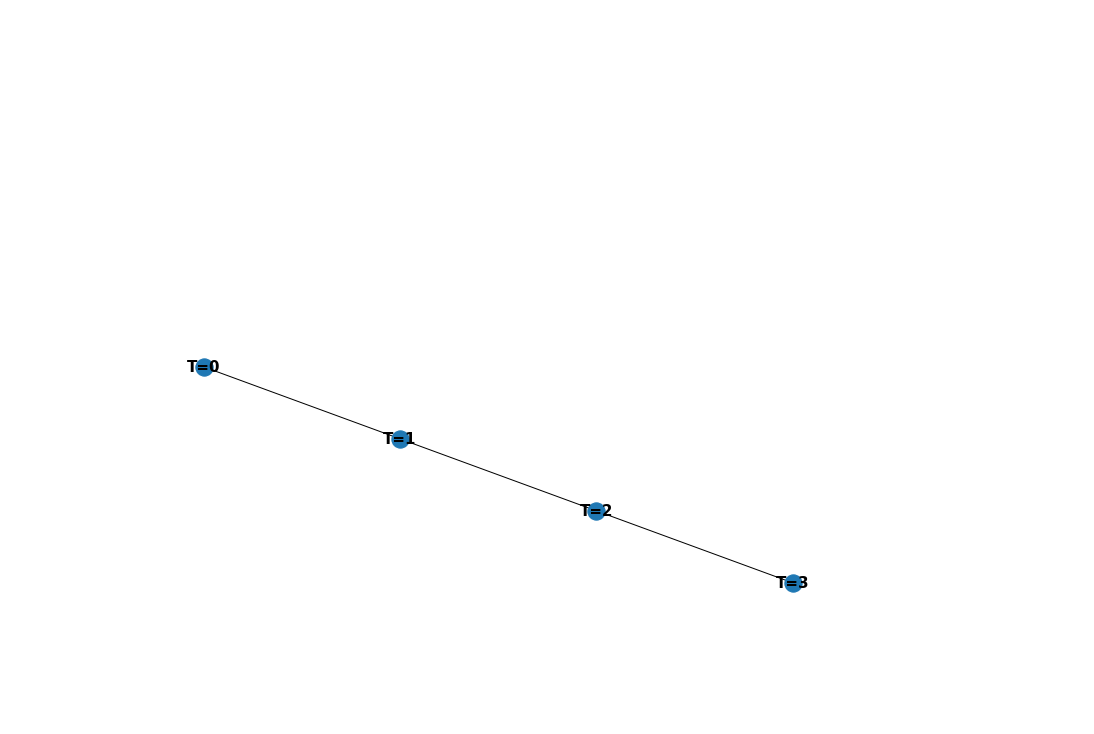

In [22]:
pos_dictionary = create_node_positions(node_levels)
draw_binary_tree(node_levels, pos_dictionary)

In [23]:
#The solution is to make node labels and assign them manually

#Create a separate object for node_labels
node_levels = create_nodes(100, 3, .1)
node_labels = []
for i in range(len(node_levels)):
    node_labels.append([x[:3] for x in node_levels[i]])
print(node_labels)

[['T=0'], ['T=1', 'T=1'], ['T=2', 'T=2', 'T=2'], ['T=3', 'T=3', 'T=3', 'T=3']]


In [24]:
#Then create a dictionary which maps each label to the position of the node

node_label_dictionary = {}
for i1 in range(len(node_levels)):
    for i2 in range(len(node_levels[i1])):
        node_label_dictionary[node_levels[i1][i2]] = node_labels[i1][i2]
print(node_label_dictionary)

{'T=0-$100.00': 'T=0', 'T=1-$90.48': 'T=1', 'T=1-$110.52': 'T=1', 'T=2-$81.87': 'T=2', 'T=2-$100.00': 'T=2', 'T=2-$122.14': 'T=2', 'T=3-$74.08': 'T=3', 'T=3-$90.48': 'T=3', 'T=3-$110.52': 'T=3', 'T=3-$134.99': 'T=3'}


In [25]:
#Turn it into a function
def build_label_dictionary(node_levels, node_labels):
    node_label_dictionary = {}
    for i1 in range(len(node_levels)):
        for i2 in range(len(node_levels[i1])):
            node_label_dictionary[node_levels[i1][i2]] = node_labels[i1][i2]
    return node_label_dictionary
print(build_label_dictionary(node_levels, node_labels))

{'T=0-$100.00': 'T=0', 'T=1-$90.48': 'T=1', 'T=1-$110.52': 'T=1', 'T=2-$81.87': 'T=2', 'T=2-$100.00': 'T=2', 'T=2-$122.14': 'T=2', 'T=3-$74.08': 'T=3', 'T=3-$90.48': 'T=3', 'T=3-$110.52': 'T=3', 'T=3-$134.99': 'T=3'}


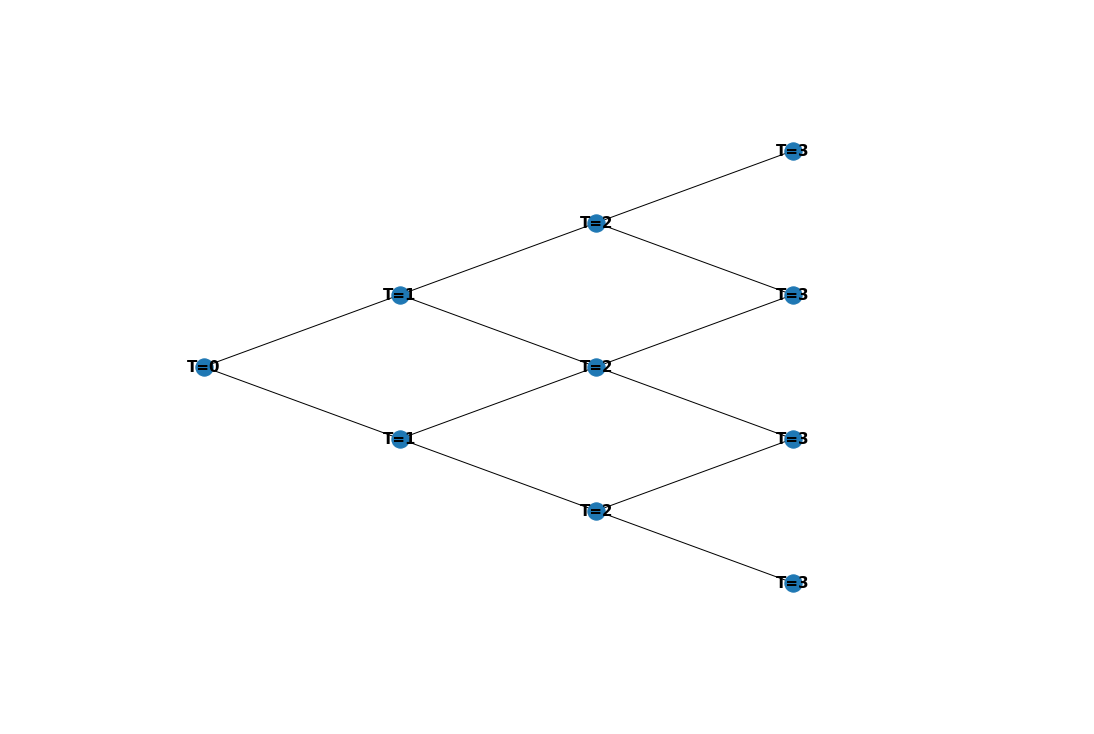

In [26]:
#Function to draw labels
def draw_node_labels(G, node_label_dictionary, label_positions):
    nx.draw_networkx_labels(G,label_positions, node_label_dictionary, font_weight='bold', font_size=15)

def draw_binary_tree(node_levels, pos_dictionary, node_labels):
    G = nx.Graph()
    draw_nodes_edges(G, node_levels)
    #Switch with_labels to False
    nx.draw(G, pos=pos_dictionary, with_labels=False, font_weight='bold', font_size=15)
    #Create the label dictionary
    node_label_dictionary = build_label_dictionary(node_levels, node_labels)
    #Label the nodes with the position dictionary and label dictionary
    draw_node_labels(G, node_label_dictionary, pos_dictionary)
    plt.xlim([-.5,.25+.5*len(node_levels)])
    plt.ylim([-.5-.5*len(node_levels),.5+.5*len(node_levels)])
    plt.show()
    
node_levels = create_nodes(100, 3, .1)
node_labels = []
for i in range(len(node_levels)):
    node_labels.append([x[:3] for x in node_levels[i]])
pos_dictionary = create_node_positions(node_levels)
draw_binary_tree(node_levels, pos_dictionary,node_labels)

In [27]:
#We can also move the labels up
label_positions = {}
for key in pos_dictionary.keys():
    pos = pos_dictionary[key]
    #Add .5 to the y position
    label_positions[key] = (pos[0], pos[1]+.25)
print(label_positions)

{'T=0-$100.00': (0.0, 0.25), 'T=1-$90.48': (0.5, 0.75), 'T=1-$110.52': (0.5, -0.25), 'T=2-$81.87': (1.0, 1.25), 'T=2-$100.00': (1.0, 0.25), 'T=2-$122.14': (1.0, -0.75), 'T=3-$74.08': (1.5, 1.75), 'T=3-$90.48': (1.5, 0.75), 'T=3-$110.52': (1.5, -0.25), 'T=3-$134.99': (1.5, -1.25)}


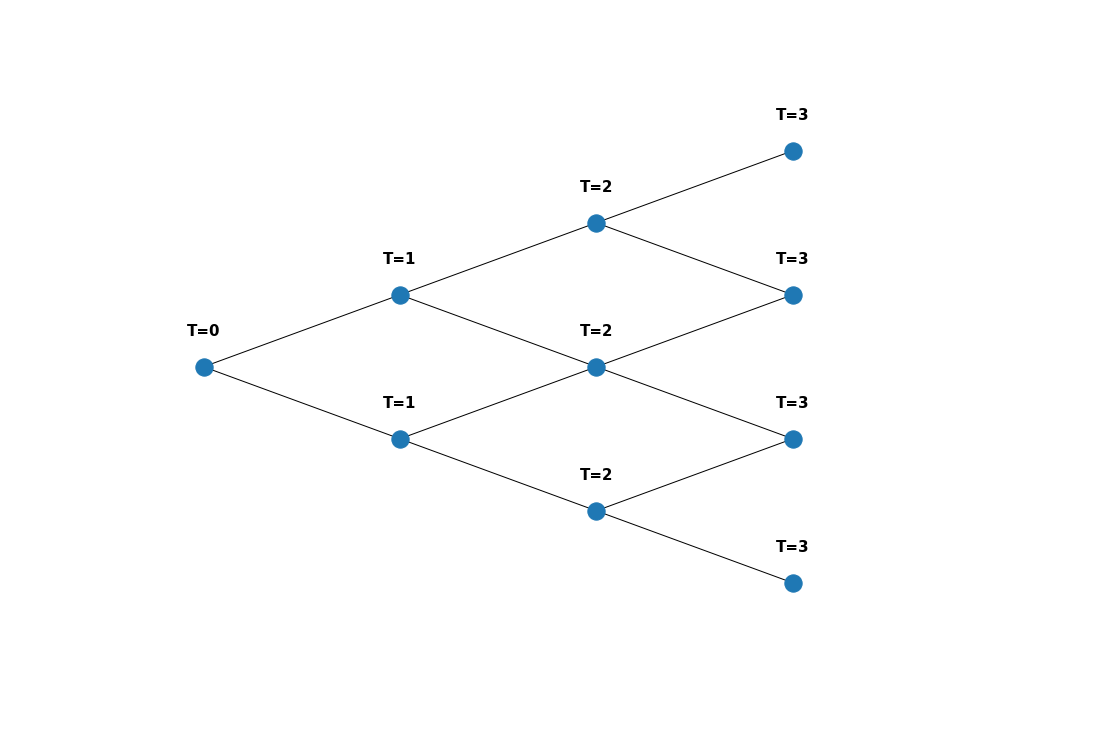

In [28]:
#Update function to also give back label_positions
def build_label_dictionary(node_levels, node_labels, pos_dictionary):
    node_label_dictionary = {}
    label_positions = {}
    for i1 in range(len(node_levels)):
        for i2 in range(len(node_levels[i1])):
            node_label_dictionary[node_levels[i1][i2]] = node_labels[i1][i2]
            
            #Get the position
            key = node_levels[i1][i2]
            pos = pos_dictionary[key]
            label_positions[key] = (pos[0], pos[1]+.25)
    return node_label_dictionary, label_positions

def draw_binary_tree(node_levels, pos_dictionary, node_labels):
    G = nx.Graph()
    draw_nodes_edges(G, node_levels)
    nx.draw(G, pos=pos_dictionary, with_labels=False, font_weight='bold', font_size=15)
    #The function returns label positions now
    node_label_dictionary, label_positions = build_label_dictionary(node_levels, node_labels, pos_dictionary)
    #Change the last argument to be label positions
    draw_node_labels(G, node_label_dictionary, label_positions)
    plt.xlim([-.5,.25+.5*len(node_levels)])
    plt.ylim([-.5-.5*len(node_levels),.5+.5*len(node_levels)])
    plt.show()

#Run the version
node_levels = create_nodes(100, 3, .1)
node_labels = []
for i in range(len(node_levels)):
    node_labels.append([x[:3] for x in node_levels[i]])
pos_dictionary = create_node_positions(node_levels)
draw_binary_tree(node_levels, pos_dictionary,node_labels)

In [29]:
#Now change the function to have time increment choices
#As well a second step that converts the node labels
def create_nodes(S, T, sigma, T_increment):
    up = np.exp(sigma * (T_increment ** .5))
    down = 1/up
    
    node_levels = []
    for t in range(T+1):
        nodes = [S * (up ** k) * (down ** (t-k))  for k in range(t+1)]
        nodes = nodes[::-1]
        node_levels.append(nodes)
    return node_levels
node_levels = create_nodes(100, 12, .08, 1/12)
print(node_levels)


def convert_nodes_to_labels(node_levels):
    node_labels = []
    for t in range(len(node_levels)):
        nodes = ["T={}-${:.2f}".format(t, x) for x in node_levels[t]]
        node_labels.append(nodes)
    return node_labels
node_levels = convert_nodes_to_labels(node_levels)
print()
print(node_levels)

[[100.0], [102.33627421420135, 97.7170614895445], [104.72713020044213, 100.00000000000001, 95.4862410615142], [107.17384313858813, 102.33627421420137, 97.7170614895445, 93.30634889213452], [109.67771800020355, 104.72713020044213, 100.00000000000003, 95.48624106151422, 91.17622232057602], [112.2400902445668, 107.17384313858813, 102.33627421420137, 97.71706148954452, 93.30634889213454, 89.09472522884107], [114.86232653094692, 109.67771800020358, 104.72713020044213, 100.00000000000001, 95.48624106151422, 91.17622232057603, 87.06074743580734], [117.54582544752121, 112.24009024456679, 107.17384313858815, 102.33627421420137, 97.71706148954452, 93.30634889213455, 89.09472522884107, 85.07320410510489], [120.29201825732176, 114.86232653094694, 109.67771800020357, 104.72713020044215, 100.00000000000001, 95.48624106151422, 91.17622232057604, 87.06074743580734, 83.13103516651104], [123.10236966160997, 117.5458254475212, 112.24009024456682, 107.17384313858813, 102.33627421420138, 97.71706148954452,

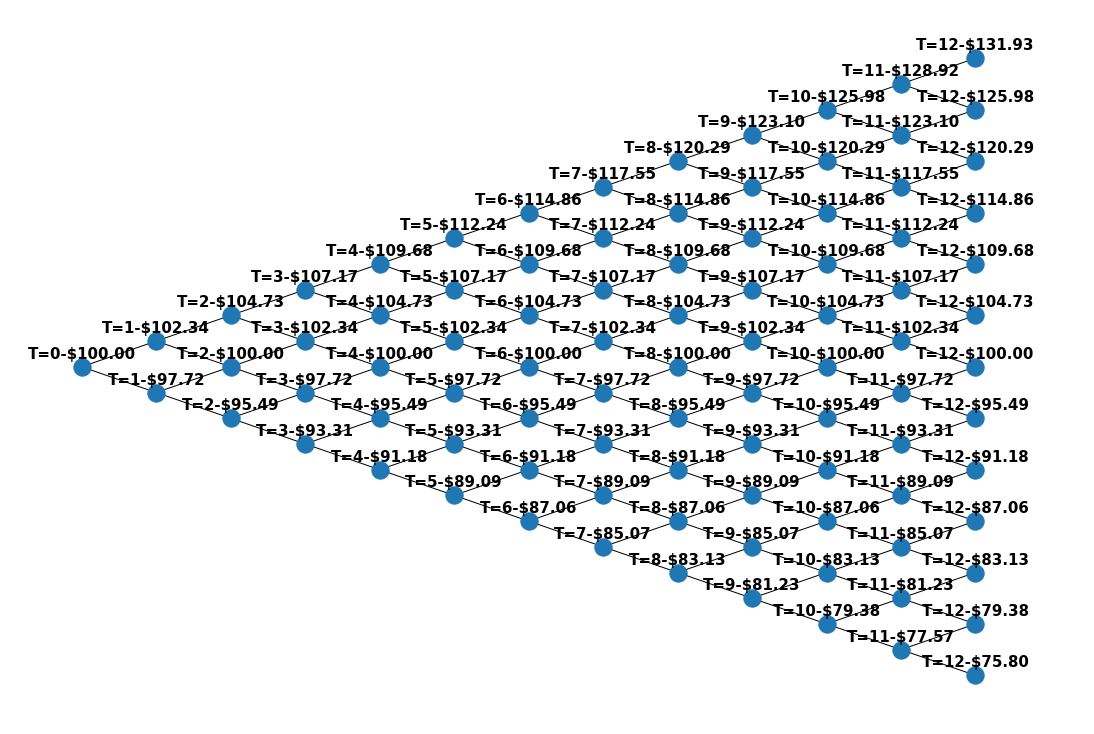

In [30]:
node_levels = create_nodes(100, 12, .08, 1/12)
node_levels = convert_nodes_to_labels(node_levels)
pos_dictionary = create_node_positions(node_levels)
draw_binary_tree(node_levels, pos_dictionary,node_levels)

In [31]:
#Formula to compute risk-neutral probability
def compute_up_probability(rf, T_increment, sigma):
    r_period = np.exp(sigma * (T_increment ** .5))
    rf_period = np.exp(rf * T_increment)
    up = r_period
    down = 1/r_period
    return (rf_period - down) /(up-down)
p_up = compute_up_probability(.04, 1/12, .08)
print(p_up)

0.5665095272999096


In [32]:
#Probability at time 1 for nodes
print(p_up)
print(1-p_up)
print()

#Probability of top node at time 2
print(p_up * p_up)
#Probability of middle node (from top node at t=1 down, or up from the bottom node at t=1)
print(p_up * (1-p_up) + (1-p_up) * p_up)
print((1-p_up) * (1-p_up))

0.5665095272999096
0.43349047270009045

0.32093304452156696
0.4911529655566852
0.18791398992174785


In [33]:
import math
#Easy way to get a factorial 
print(math.factorial(5))

120


In [34]:
#Simple formula for computing a binomial coeffecient
def binomial_coefficient(n, k):
    return math.factorial(n) / (math.factorial(n-k) * math.factorial(k))
print(binomial_coefficient(3, 2))

3.0


In [35]:
#Probability density function for a binomial distribution
def binomial_distribution_pdf(p, n, k):
    q = 1-p
    return (p ** k) * (q ** (n-k)) * binomial_coefficient(n, k)
print(binomial_distribution_pdf(p_up, 3, 2))

0.41736425152419965


In [36]:
#Build a function to find associated probabilities for each node
def create_node_probabilities(rf, T, sigma, T_increment):
    node_levels = []
    
    p_up = compute_up_probability(rf, T_increment, sigma)
    
    for t in range(T+1):
        nodes = [binomial_distribution_pdf(p_up, t, up) for up in range(t+1)]
        nodes = nodes[::-1]
        node_levels.append(nodes)
    return node_levels
probabilities = create_node_probabilities(.04, 12, .08, 1/12)
print(probabilities)

[[1.0], [0.5665095272999096, 0.43349047270009045], [0.32093304452156696, 0.4911529655566852, 0.18791398992174785], [0.18181162734683373, 0.41736425152419965, 0.31936519681082803, 0.08145892431813852], [0.10299801906588209, 0.3152544331238066, 0.3618468533626895, 0.18458902683931103, 0.035311667608310754], [0.05834935909383993, 0.22324329986021077, 0.3416494830890949, 0.261428605848721, 0.10002198062477827, 0.015307271483355102], [0.03305546783850394, 0.15176334753201598, 0.2903215307505924, 0.29620359184406664, 0.16999021489003155, 0.052030290793721304, 0.006635556351068218], [0.01872623745986823, 0.10030461265044997, 0.23025787841070594, 0.2936537744002057, 0.22470251132691088, 0.10316479404989762, 0.026313741242708983, 0.002876450459252649], [0.01060859193149581, 0.06494116422697936, 0.1739243758073721, 0.2661722574804717, 0.25459222694982175, 0.15585023656320007, 0.05962794045159679, 0.013036292719782606, 0.0012469138692798231], [0.006009868400429326, 0.041388511779598354, 0.1266811

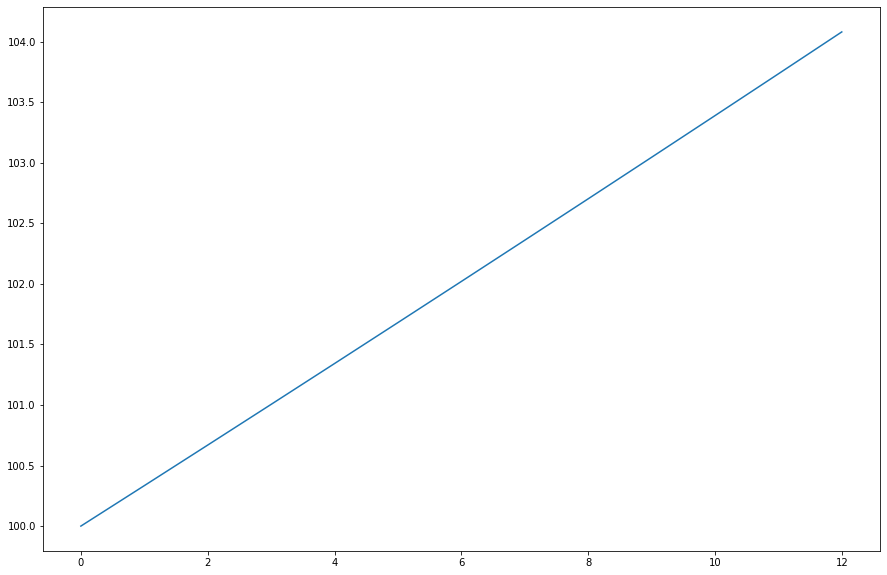

In [37]:
node_levels = create_nodes(100, 12, .08, 1/12)
probabilities = create_node_probabilities(.04, 12, .08, 1/12)

#Compute expected value of the stock in each state
expected_value = []
for prob, vals in zip(probabilities, node_levels):
    #Converting to numpy arrays and doing dot applies the dot product to vectors
    expected_value.append(np.array(prob).dot(np.array(vals)))
expected_value = pd.Series(expected_value)
expected_value.plot(kind='line')
plt.show()

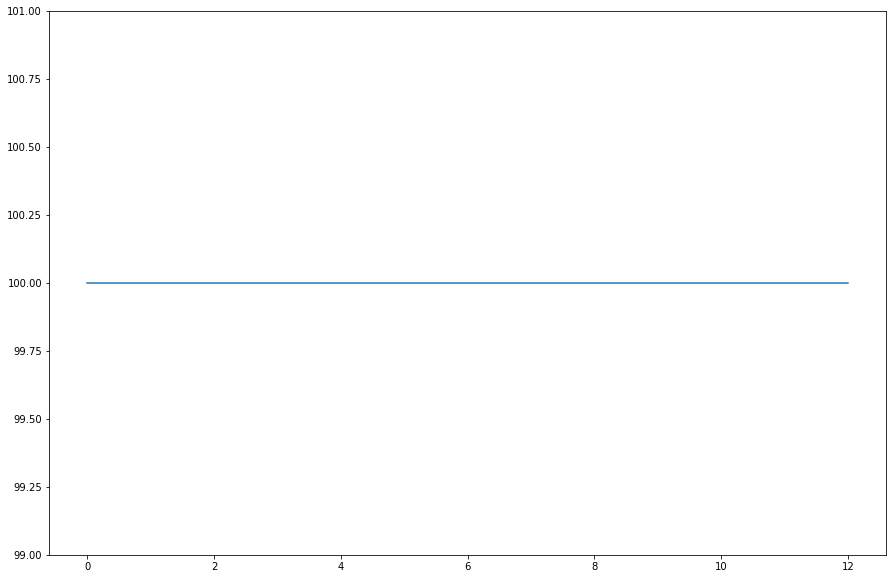

In [38]:
#Notice discounting each shows risk-neural probabilities mean no gain or loss
discount_factors = [np.exp(.04 * 1/12*t) for t in range(13)]
discount_factors = pd.Series(discount_factors)

(expected_value / discount_factors).plot(kind='line')
plt.ylim([99,101])
plt.show()

In [39]:
probabilities = create_node_probabilities(.04, 12, .08, 1/12)
node_levels = create_nodes(100, 12, .08, 1/12)

#Iterate through what each node would be valued at as a call option
for prob, vals in zip(probabilities, node_levels):
    prob = np.array(prob)
    vals = np.array(vals)
    #np.where takes a condition as the first argument and then a value or list of values for the second/third
    #which represents the values if true for each element in the second or false in the third
    vals = np.where(vals-100 < 0, 0, vals-100)
    print(vals)

[0.]
[2.33627421 0.        ]
[4.72713020e+00 1.42108547e-14 0.00000000e+00]
[7.17384314 2.33627421 0.         0.        ]
[9.67771800e+00 4.72713020e+00 2.84217094e-14 0.00000000e+00
 0.00000000e+00]
[12.24009024  7.17384314  2.33627421  0.          0.          0.        ]
[1.48623265e+01 9.67771800e+00 4.72713020e+00 1.42108547e-14
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[17.54582545 12.24009024  7.17384314  2.33627421  0.          0.
  0.          0.        ]
[2.02920183e+01 1.48623265e+01 9.67771800e+00 4.72713020e+00
 1.42108547e-14 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[23.10236966 17.54582545 12.24009024  7.17384314  2.33627421  0.
  0.          0.          0.          0.        ]
[2.59783786e+01 2.02920183e+01 1.48623265e+01 9.67771800e+00
 4.72713020e+00 4.26325641e-14 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[28.92157896 23.10236966 17.54582545 12.24009024  7.17384314  2.33627421
  0.          0.          0.   

In [40]:
def backward_induction(node_levels, strike_price):
    opt_values = []
    #The expiration level has values based on the derivative formula
    level = node_levels[-1]
    level = np.array(level)
    level = np.where(level-strike_price < 0, 0, level-strike_price).round(2)
    opt_values.append(level)
    #Go through each level in reverse order after the expiration level
    #For now, each gets ? for the value to represent not knowing
    for level in node_levels[::-1][1:]:
        opt_values.append(["?" for x in level])
    #Reverse the order of the list
    opt_values = opt_values[::-1]
    return opt_values

#Switch to 4 quarters
node_levels = create_nodes(100, 4, .08, 1/4)
print(node_levels)

print()
opt_values = backward_induction(node_levels, 100)
print(opt_values)

[[100.0], [104.08107741923882, 96.07894391523232], [108.32870676749585, 100.0, 92.31163463866358], [112.74968515793755, 104.08107741923881, 96.07894391523232, 88.69204367171575], [117.351087099181, 108.32870676749583, 99.99999999999999, 92.31163463866358, 85.21437889662113]]

[['?'], ['?', '?'], ['?', '?', '?'], ['?', '?', '?', '?'], array([17.35,  8.33,  0.  ,  0.  ,  0.  ])]


In [41]:
#Set up the data
node_levels = create_nodes(100, 4, .08, 1/4)
opt_values = backward_induction(node_levels, 100)
node_levels = convert_nodes_to_labels(node_levels)

In [42]:
#Create a function to convert the option labels while we have the questions marks
def convert_nodes_to_labels_TEMP(node_levels):
    node_labels = []
    for t in range(len(node_levels)):
        #Get rid of the string format for the number
        nodes = ["T={}-${}".format(t, x) for x in node_levels[t]]
        node_labels.append(nodes)
    return node_labels
opt_labels = convert_nodes_to_labels_TEMP(opt_values)
print(opt_labels)

[['T=0-$?'], ['T=1-$?', 'T=1-$?'], ['T=2-$?', 'T=2-$?', 'T=2-$?'], ['T=3-$?', 'T=3-$?', 'T=3-$?', 'T=3-$?'], ['T=4-$17.35', 'T=4-$8.33', 'T=4-$0.0', 'T=4-$0.0', 'T=4-$0.0']]


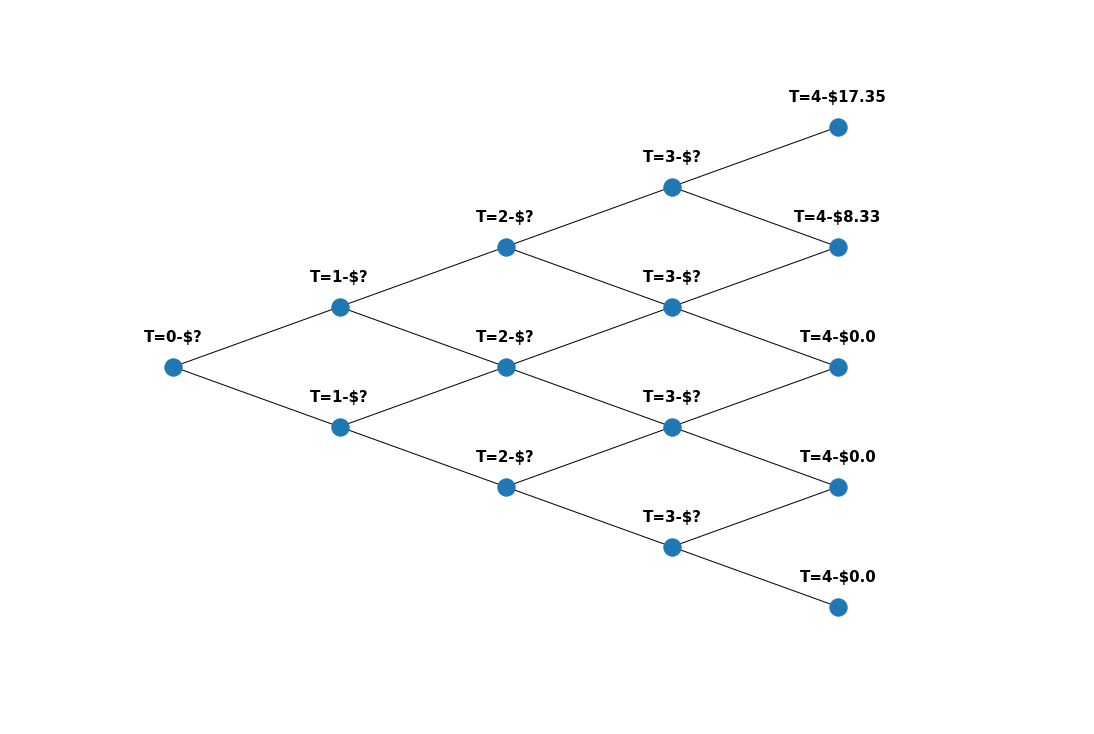

In [43]:
pos_dictionary = create_node_positions(node_levels)
draw_binary_tree(node_levels, pos_dictionary,opt_labels)

In [44]:
#Begin switching to setting variables like this to make it cleaner
sigma = .08
rf = .04
T_increment = 1/4
strike_price = 100

#Compute the next level in the binary tree
def backward_induction_node_level(level, sigma, rf, T_increment):
    p_up = compute_up_probability(rf, T_increment, sigma)
    p_down = 1-p_up
    next_level = []
    for i in range(len(level)-1):
        value = p_up * level[i+1] + p_down * level[i]
        value = value / np.exp(rf * T_increment)
        next_level.append(value)
    next_level = np.array(next_level).round(2)
    return next_level
next_level = backward_induction_node_level(opt_values[-1], sigma, rf, T_increment)
print(next_level)

[11.68  3.17  0.    0.  ]


In [45]:
def backward_induction(node_levels, strike_price, sigma, rf, T_increment):
    opt_values = []
    #The expiration level has values based on the derivative formula
    level = node_levels[-1]
    level = np.array(level)
    level = np.where(level-strike_price < 0, 0, level-strike_price).round(2)
    opt_values.append(level)
    #Go through each level in reverse order after the expiration level
    #Start with just one level down
    for level in node_levels[::-1][1:2]:
        opt_values.append(backward_induction_node_level(opt_values[-1], sigma, rf, T_increment))
    for level in node_levels[::-1][2:]:
        opt_values.append(["?" for x in level])
    #Reverse the order of the list
    opt_values = opt_values[::-1]
    return opt_values
node_levels = create_nodes(100, 4, .08, 1/4)
opt_values = backward_induction(node_levels, strike_price, sigma, rf, T_increment)
print(opt_values)

[['?'], ['?', '?'], ['?', '?', '?'], array([11.68,  3.17,  0.  ,  0.  ]), array([17.35,  8.33,  0.  ,  0.  ,  0.  ])]


Stock Values


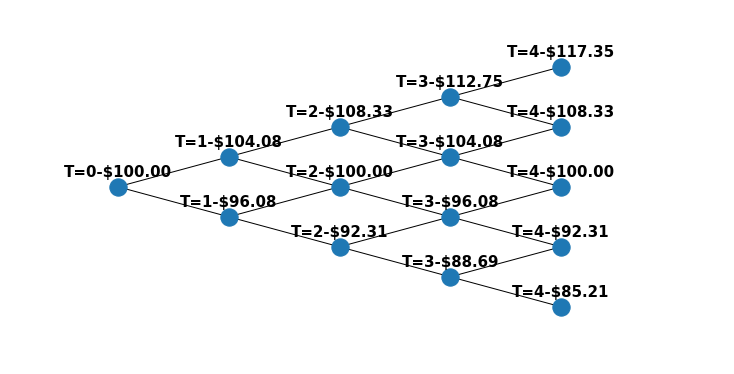

Call Option Values


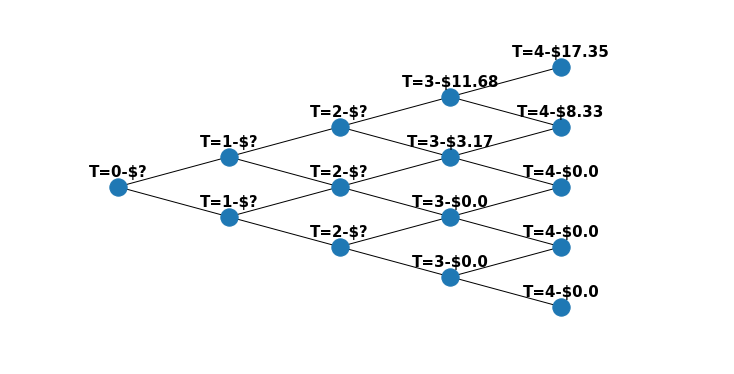

In [46]:
sigma = .08
rf = .04
T_increment = 1/4
T = 4
strike_price = 100
price0 = 100

node_levels = create_nodes(price0, T, sigma, T_increment)
opt_values = backward_induction(node_levels, 100, sigma, rf, T_increment)
node_levels = convert_nodes_to_labels(node_levels)
opt_labels = convert_nodes_to_labels_TEMP(opt_values)
pos_dictionary = create_node_positions(node_levels)
plt.rcParams["figure.figsize"] = (10,5)
print("Stock Values")
draw_binary_tree(node_levels, pos_dictionary,node_levels)
print("Call Option Values")
draw_binary_tree(node_levels, pos_dictionary,opt_labels)

In [47]:
#Finalize it to be all levels
def backward_induction(node_levels, strike_price, sigma, rf, T_increment):
    opt_values = []
    level = node_levels[-1]
    level = np.array(level)
    level = np.where(level-strike_price < 0, 0, level-strike_price).round(2)
    opt_values.append(level)
    for level in node_levels[::-1][1:]:
        opt_values.append(backward_induction_node_level(opt_values[-1], sigma, rf, T_increment))
    opt_values = opt_values[::-1]
    return opt_values
node_levels = create_nodes(price0, T, sigma, T_increment)
opt_values = backward_induction(node_levels, strike_price, sigma, rf, T_increment)
print(opt_values)

[array([1.49]), array([3.17, 0.46]), array([6.38, 1.21, 0.  ]), array([11.68,  3.17,  0.  ,  0.  ]), array([17.35,  8.33,  0.  ,  0.  ,  0.  ])]


Stock Values


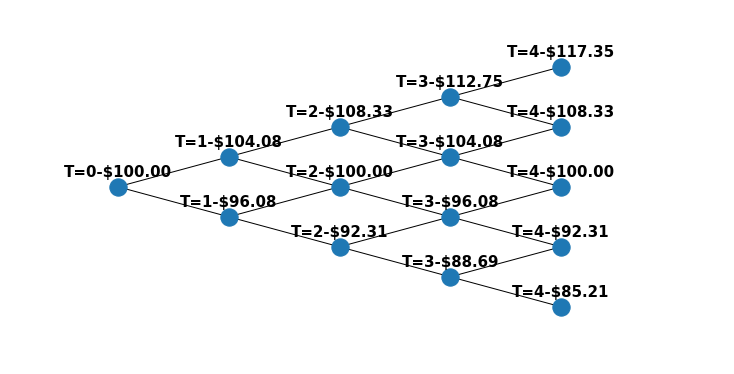

Call Option Values


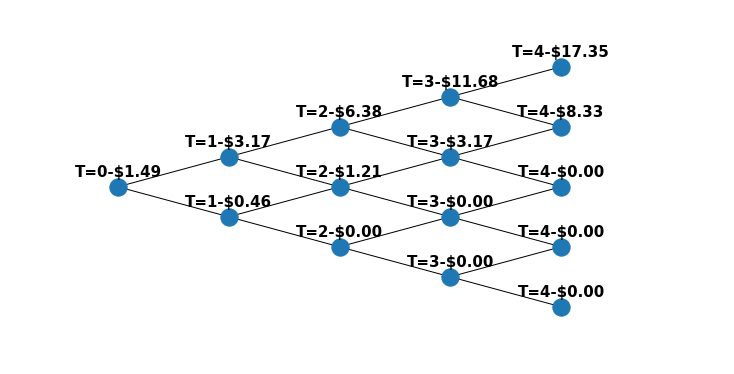

In [48]:
node_levels = create_nodes(price0, T, sigma, T_increment)
opt_values = backward_induction(node_levels, 100, sigma, rf, T_increment)
node_levels = convert_nodes_to_labels(node_levels)
opt_labels = convert_nodes_to_labels(opt_values)
pos_dictionary = create_node_positions(node_levels)
print("Stock Values")
draw_binary_tree(node_levels, pos_dictionary,node_levels)
print("Call Option Values")
draw_binary_tree(node_levels, pos_dictionary,opt_labels)

Stock Values


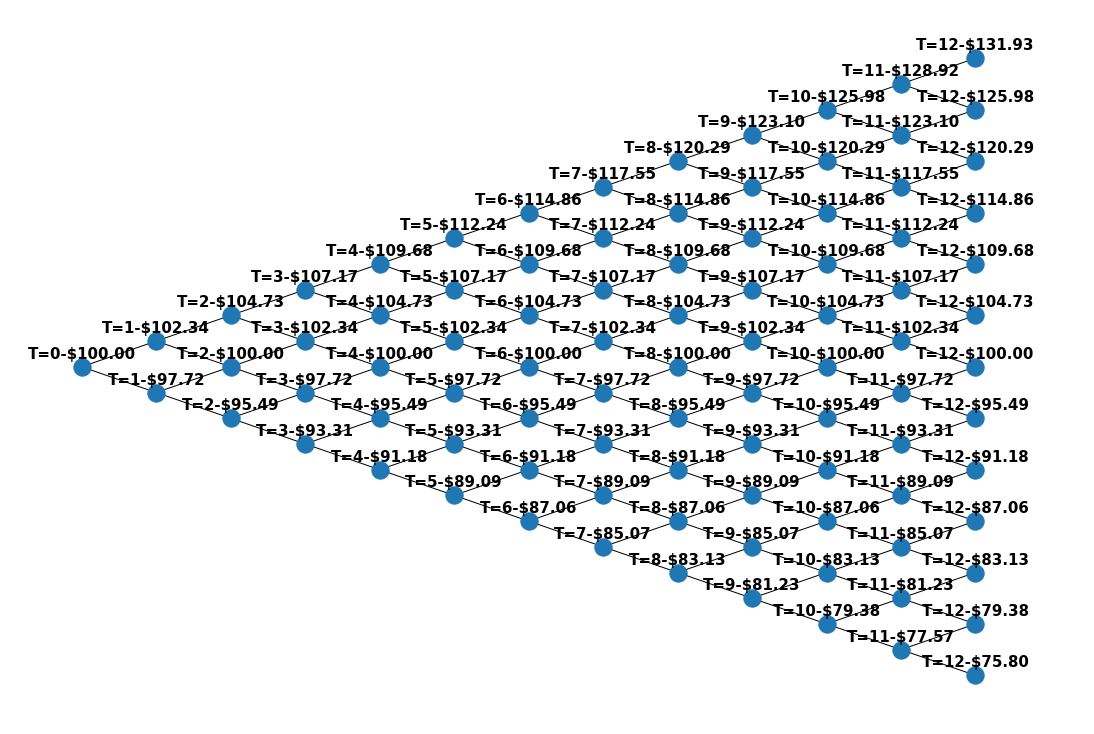

Call Option Values


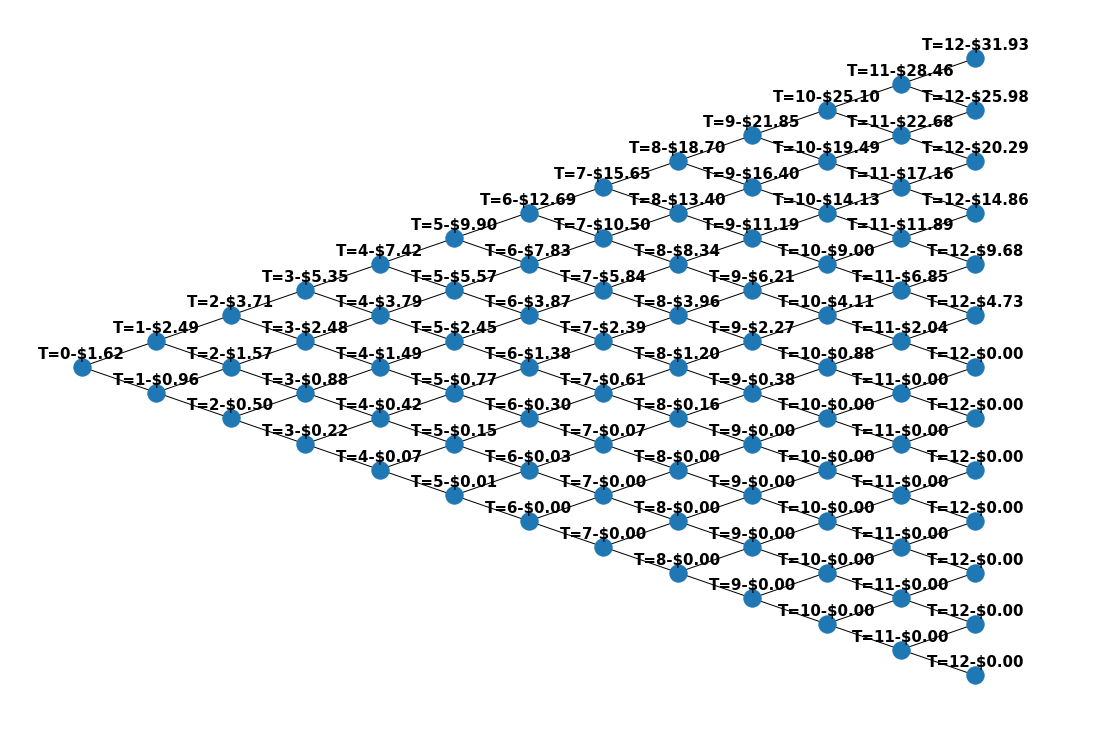

In [49]:
sigma = .08
rf = .04
T_increment = 1/12
T = 12
strike_price = 100
price0 = 100

plt.rcParams["figure.figsize"] = (15,10)

node_levels = create_nodes(price0, T, sigma, T_increment)
opt_values = backward_induction(node_levels, 100, sigma, rf, T_increment)
node_levels = convert_nodes_to_labels(node_levels)
opt_labels = convert_nodes_to_labels(opt_values)
pos_dictionary = create_node_positions(node_levels)
print("Stock Values")
draw_binary_tree(node_levels, pos_dictionary,node_levels)
print("Call Option Values")
draw_binary_tree(node_levels, pos_dictionary,opt_labels)

In [50]:
#Add in an ability to change the option valuation
def call_value(level, strike_price):
    level = np.where(level-strike_price < 0, 0, level-strike_price).round(2)
    return level
def backward_induction(node_levels, strike_price, sigma, rf, T_increment, option_valuation_function):
    opt_values = []
    level = node_levels[-1]
    level = np.array(level)
    level = option_valuation_function(level, strike_price)
    opt_values.append(level)
    for level in node_levels[::-1][1:]:
        opt_values.append(backward_induction_node_level(opt_values[-1], sigma, rf, T_increment))
    opt_values = opt_values[::-1]
    return opt_values

node_levels = create_nodes(price0, T, sigma, T_increment)
opt_values = backward_induction(node_levels, strike_price, sigma, rf, T_increment, call_value)
print(opt_values)

[array([1.62]), array([2.49, 0.96]), array([3.71, 1.57, 0.5 ]), array([5.35, 2.48, 0.88, 0.22]), array([7.42, 3.79, 1.49, 0.42, 0.07]), array([9.9 , 5.57, 2.45, 0.77, 0.15, 0.01]), array([12.69,  7.83,  3.87,  1.38,  0.3 ,  0.03,  0.  ]), array([15.65, 10.5 ,  5.84,  2.39,  0.61,  0.07,  0.  ,  0.  ]), array([18.7 , 13.4 ,  8.34,  3.96,  1.2 ,  0.16,  0.  ,  0.  ,  0.  ]), array([21.85, 16.4 , 11.19,  6.21,  2.27,  0.38,  0.  ,  0.  ,  0.  ,
        0.  ]), array([25.1 , 19.49, 14.13,  9.  ,  4.11,  0.88,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ]), array([28.46, 22.68, 17.16, 11.89,  6.85,  2.04,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ]), array([31.93, 25.98, 20.29, 14.86,  9.68,  4.73,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ])]


In [51]:
#And this let's us switch the function to value put options
def put_value(level, strike_price):
    level = np.where(strike_price - level < 0, 0, strike_price- level).round(2)
    return level

opt_values = backward_induction(node_levels, strike_price, sigma, rf, T_increment, put_value)
print(opt_values)

[array([4.81]), array([3.25, 6.04]), array([1.95, 4.26, 7.43]), array([0.99, 2.7 , 5.47, 8.97]), array([ 0.38,  1.46,  3.66,  6.88, 10.63]), array([ 0.08,  0.61,  2.12,  4.86,  8.46, 12.36]), array([ 0.  ,  0.15,  0.96,  3.02,  6.29, 10.17, 14.11]), array([ 0.  ,  0.  ,  0.26,  1.5 ,  4.2 ,  7.93, 11.95, 15.85]), array([ 0.  ,  0.  ,  0.  ,  0.46,  2.3 ,  5.67,  9.71, 13.73, 17.56]), array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.81,  3.45,  7.4 , 11.54, 15.49,
       19.25]), array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.44,  5.01,  9.27, 13.34,
       17.22, 20.92]), array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  2.55,  6.93, 11.12,
       15.12, 18.93, 22.57]), array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  4.51,  8.82,
       12.94, 16.87, 20.62, 24.2 ])]


Stock Values


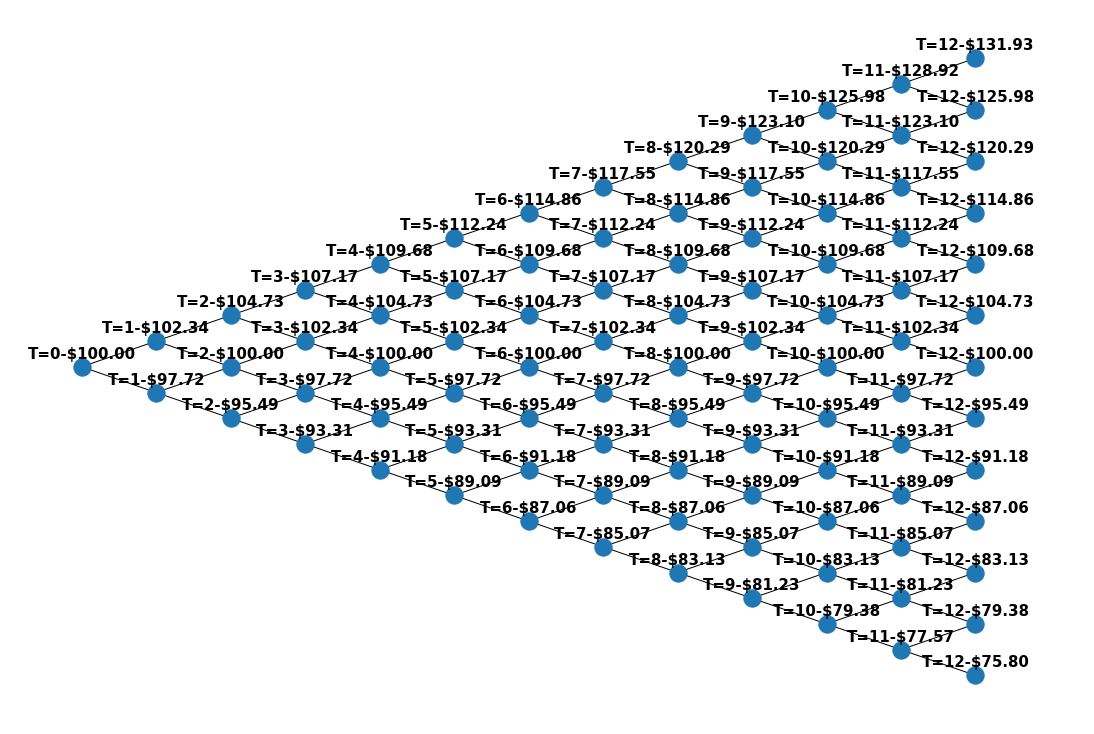

Call Option Values


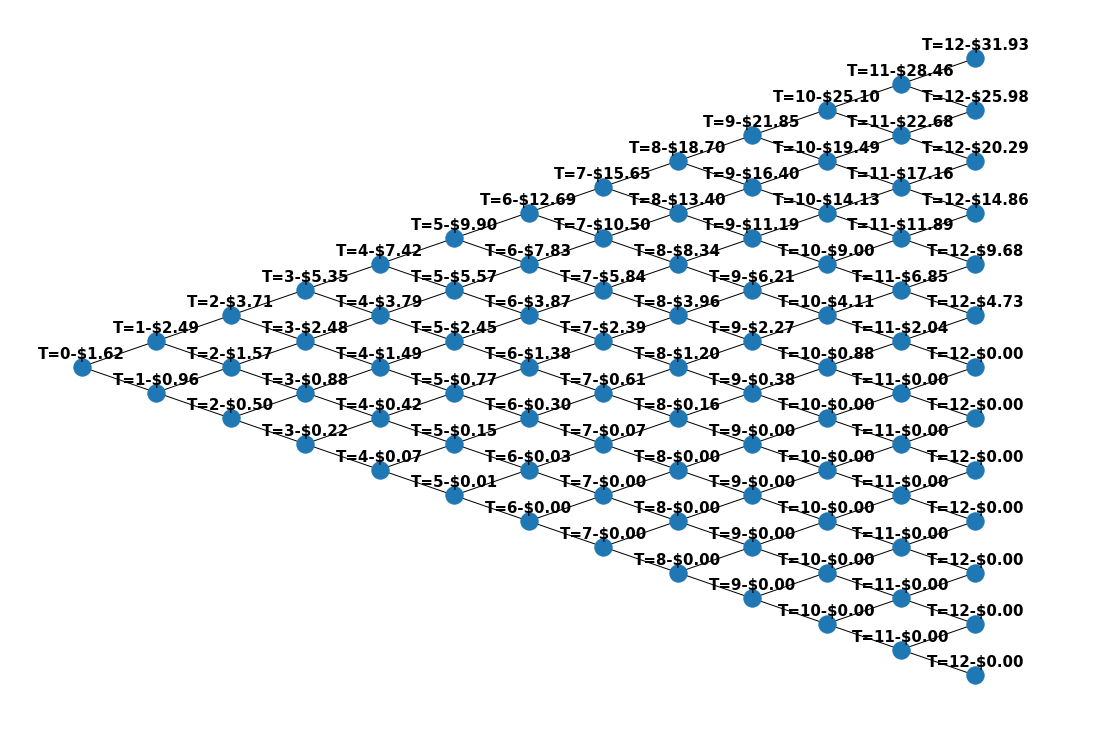

Put Option Values


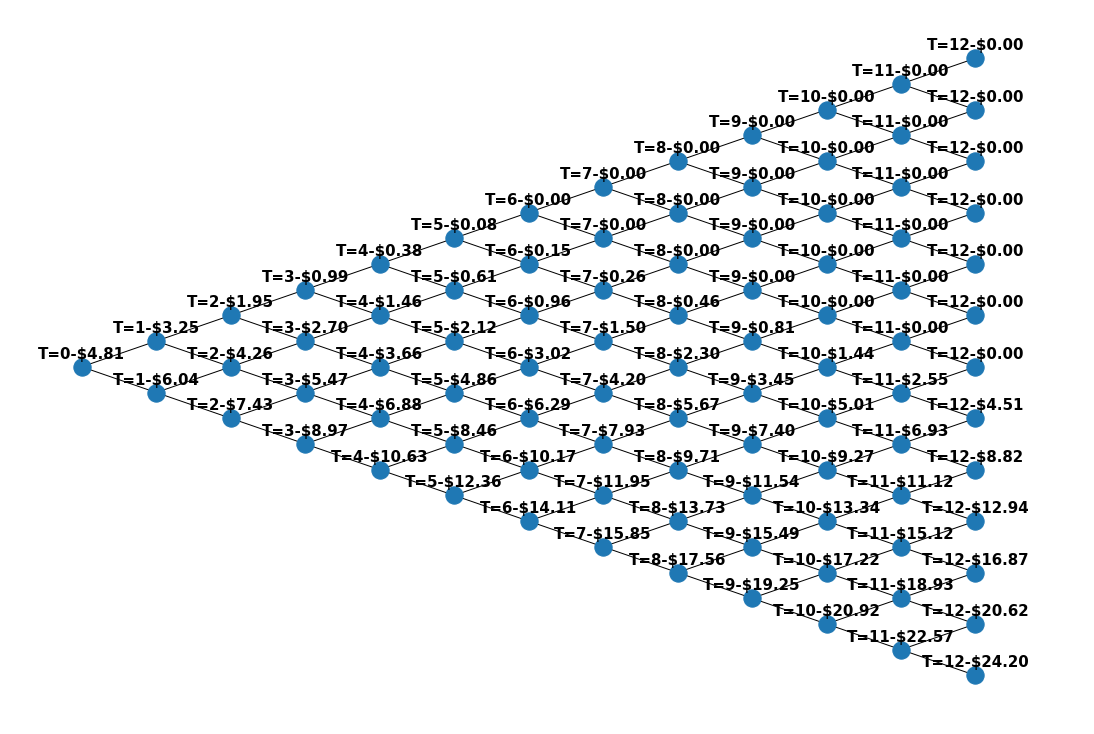

In [52]:
node_levels = create_nodes(price0, T, sigma, T_increment)
call_opt_values = backward_induction(node_levels, 100, sigma, rf, T_increment, call_value)
put_opt_values = backward_induction(node_levels, 100, sigma, rf, T_increment, put_value)
node_levels = convert_nodes_to_labels(node_levels)
call_opt_labels = convert_nodes_to_labels(call_opt_values)
put_opt_labels = convert_nodes_to_labels(put_opt_values)

pos_dictionary = create_node_positions(node_levels)
print("Stock Values")
draw_binary_tree(node_levels, pos_dictionary,node_levels)
print("Call Option Values")
draw_binary_tree(node_levels, pos_dictionary,call_opt_labels)
print("Put Option Values")
draw_binary_tree(node_levels, pos_dictionary,put_opt_labels)

Stock Values


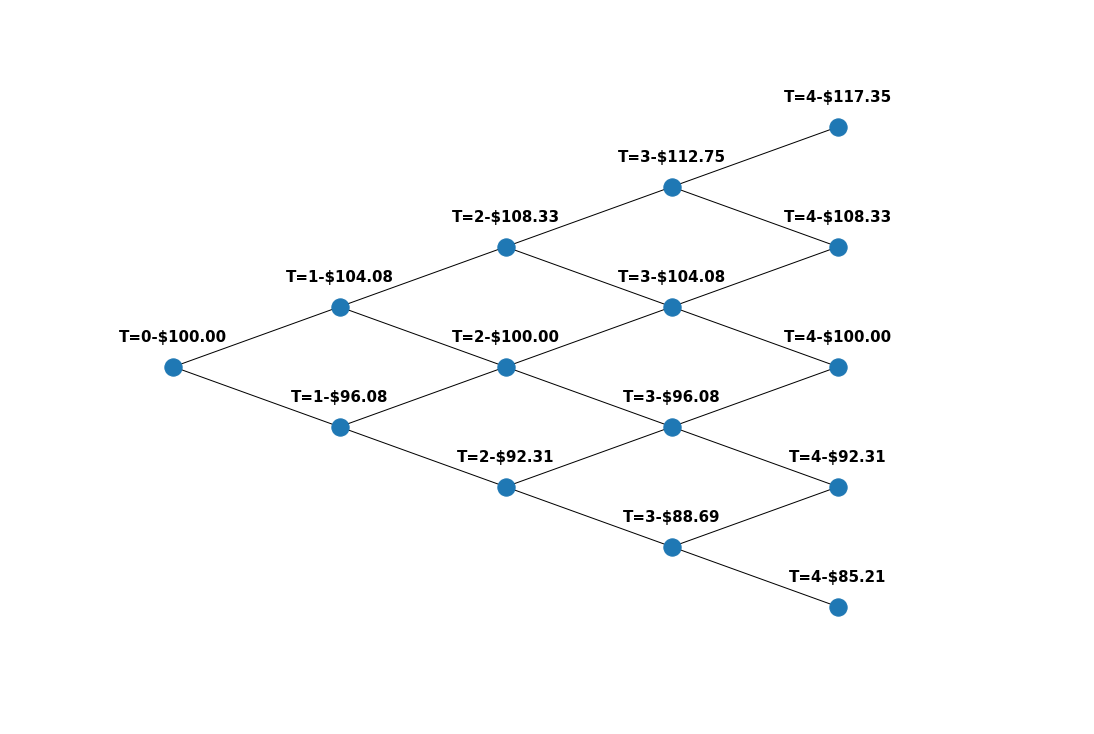

Call Option Values


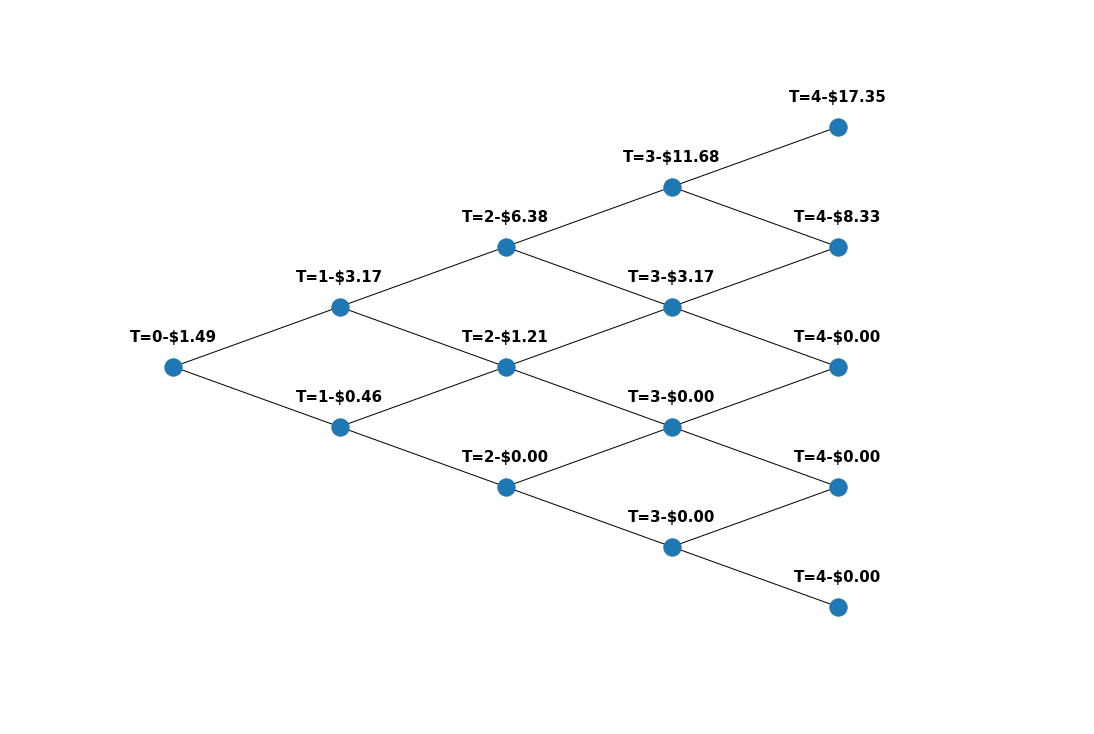

Put Option Values


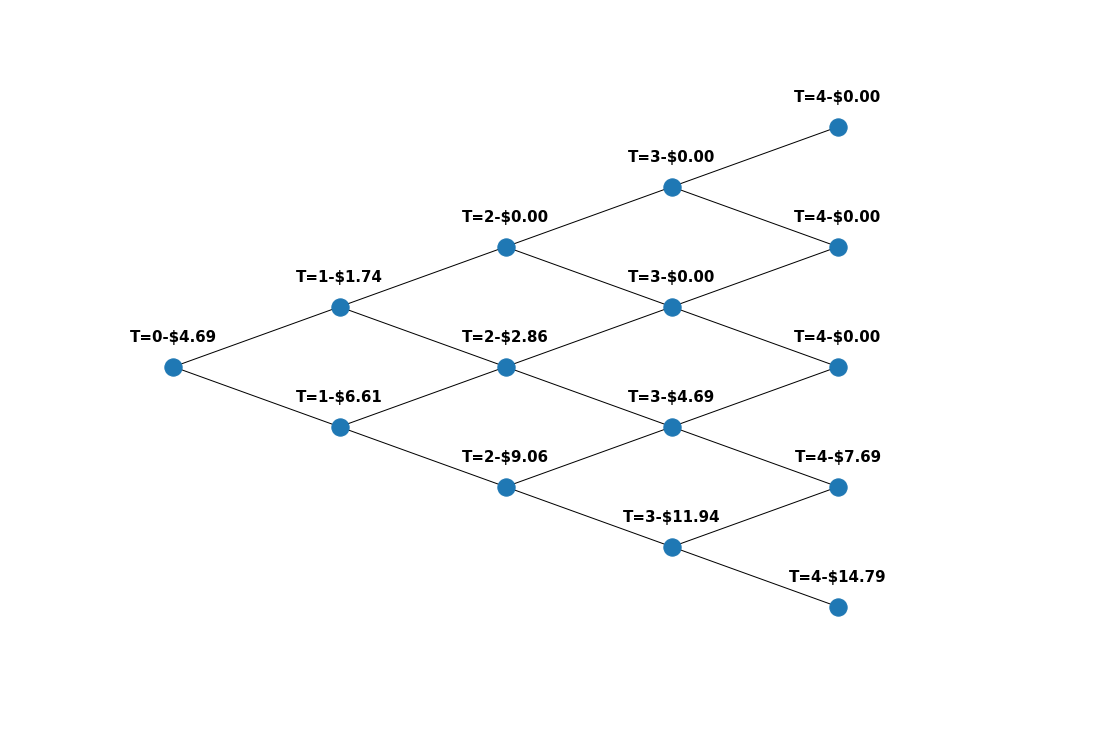

In [53]:
sigma = .08
rf = .04
T_increment = 1/4
T = 4
strike_price = 100
price0 = 100

node_levels = create_nodes(price0, T, sigma, T_increment)
call_opt_values = backward_induction(node_levels, 100, sigma, rf, T_increment, call_value)
put_opt_values = backward_induction(node_levels, 100, sigma, rf, T_increment, put_value)
node_levels = convert_nodes_to_labels(node_levels)
call_opt_labels = convert_nodes_to_labels(call_opt_values)
put_opt_labels = convert_nodes_to_labels(put_opt_values)

pos_dictionary = create_node_positions(node_levels)
print("Stock Values")
draw_binary_tree(node_levels, pos_dictionary,node_levels)
print("Call Option Values")
draw_binary_tree(node_levels, pos_dictionary,call_opt_labels)
print("Put Option Values")
draw_binary_tree(node_levels, pos_dictionary,put_opt_labels)

In [54]:
def straddle_value(level, strike_price):
    level = abs(strike_price - level)
    return level

Stock Values


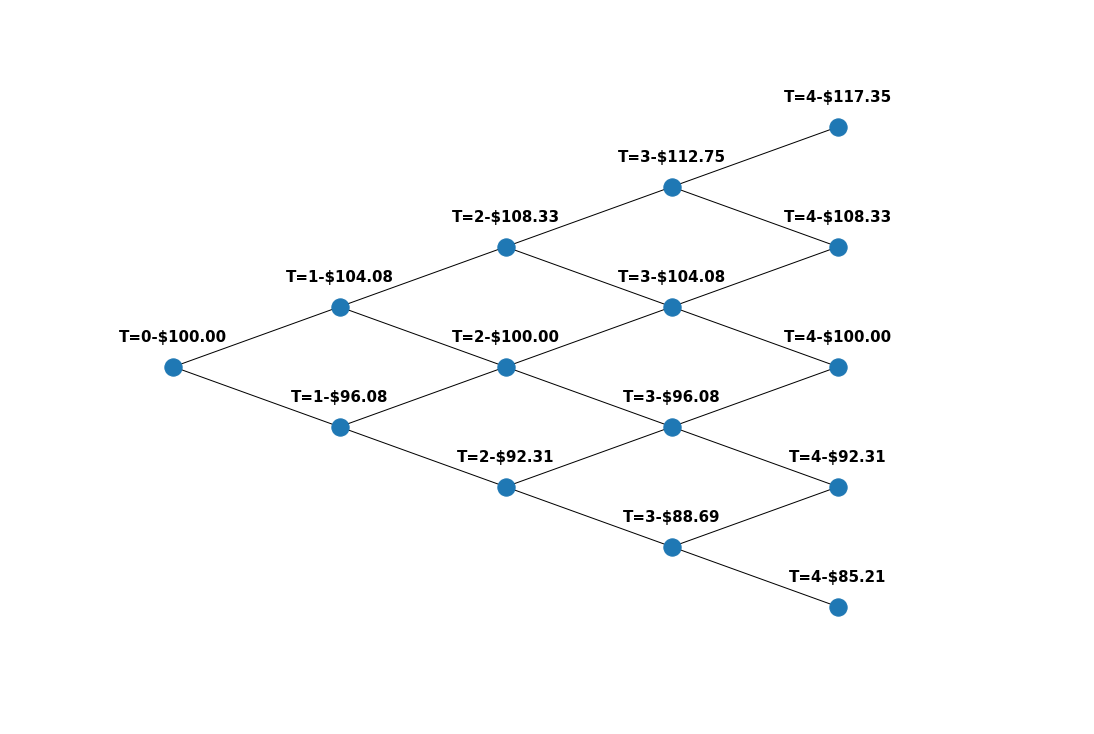

Call Option Values


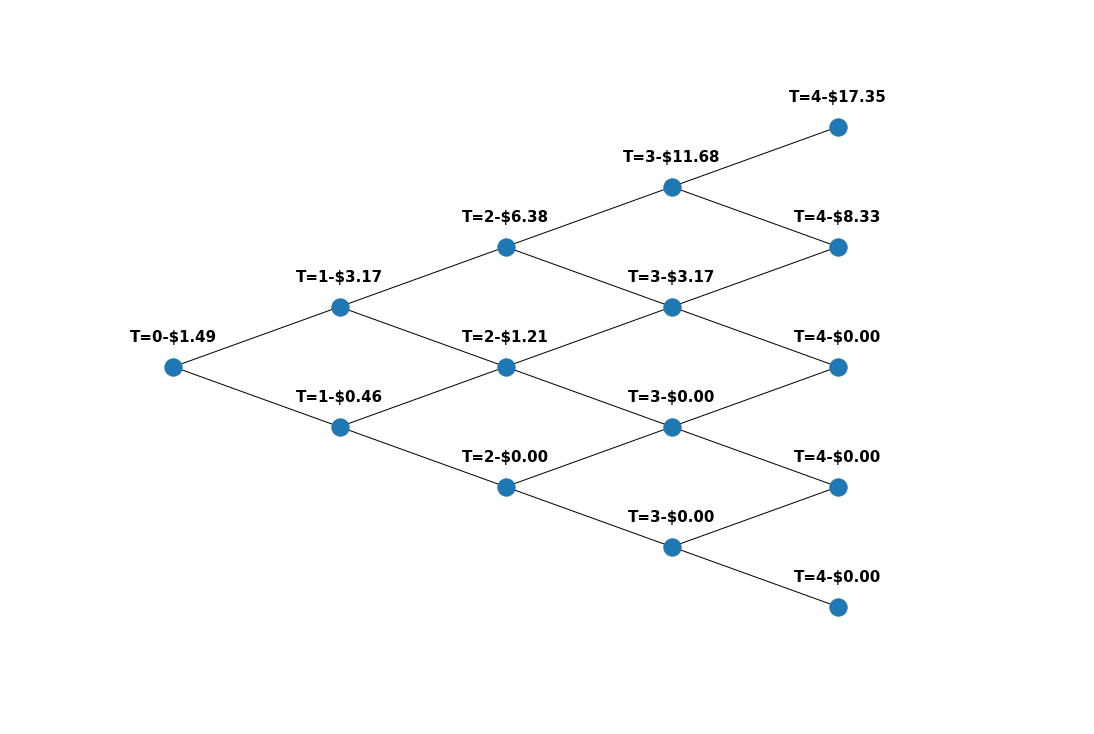

Put Option Values


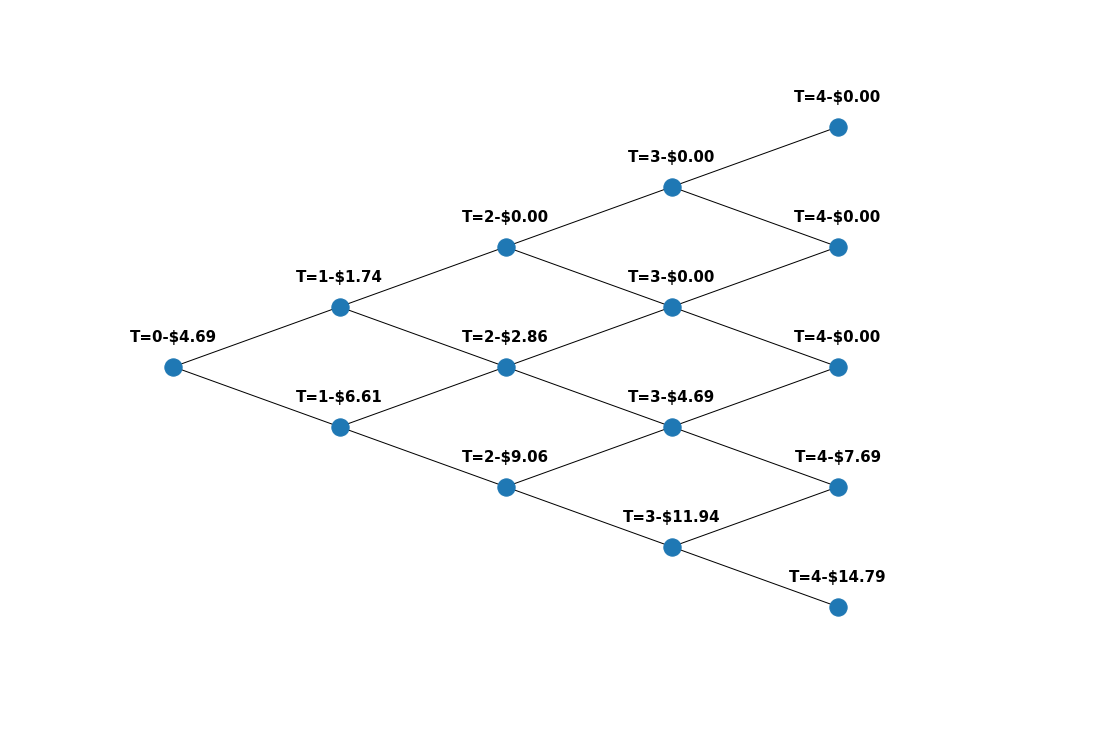

Straddle Values


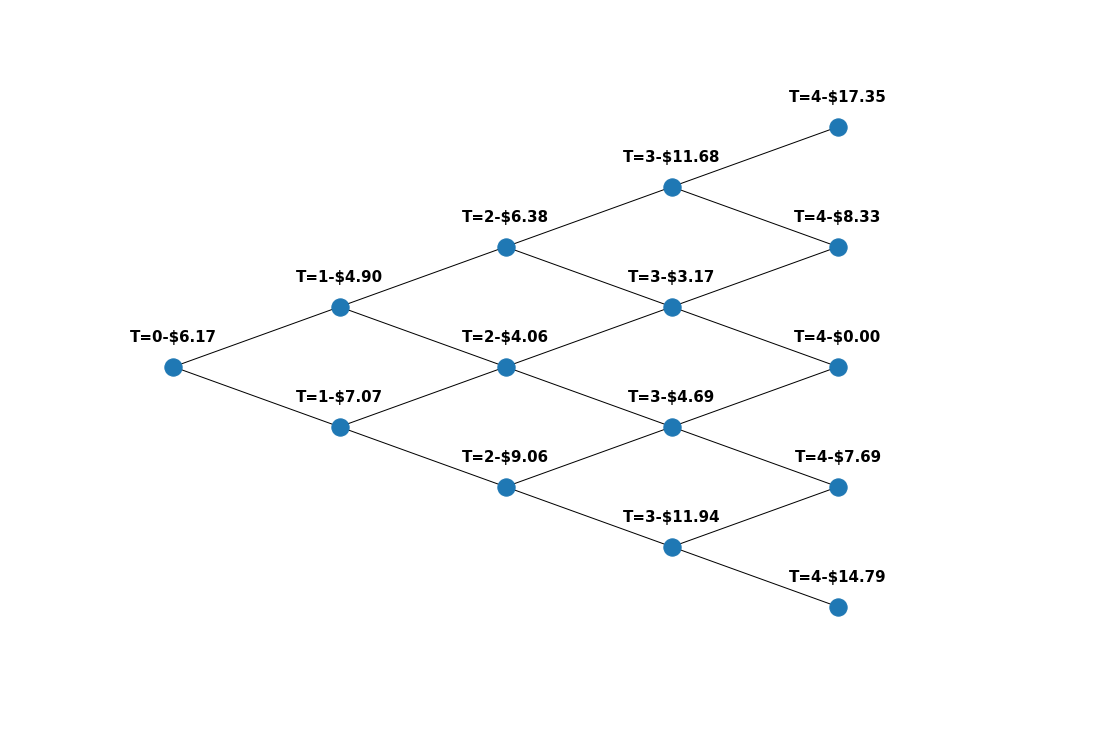

In [55]:
sigma = .08
rf = .04
T_increment = 1/4
T = 4
strike_price = 100
price0 = 100

node_levels = create_nodes(price0, T, sigma, T_increment)
call_opt_values = backward_induction(node_levels, 100, sigma, rf, T_increment, call_value)
put_opt_values = backward_induction(node_levels, 100, sigma, rf, T_increment, put_value)
straddle_opt_values = backward_induction(node_levels, 100, sigma, rf, T_increment, straddle_value)
node_levels = convert_nodes_to_labels(node_levels)
call_opt_labels = convert_nodes_to_labels(call_opt_values)
put_opt_labels = convert_nodes_to_labels(put_opt_values)
straddle_opt_labels = convert_nodes_to_labels(straddle_opt_values)

pos_dictionary = create_node_positions(node_levels)
print("Stock Values")
draw_binary_tree(node_levels, pos_dictionary,node_levels)
print("Call Option Values")
draw_binary_tree(node_levels, pos_dictionary,call_opt_labels)
print("Put Option Values")
draw_binary_tree(node_levels, pos_dictionary,put_opt_labels)
print("Straddle Values")
draw_binary_tree(node_levels, pos_dictionary,straddle_opt_labels)

In [56]:
for i in range(len(straddle_opt_values)):
    print(straddle_opt_values[i] - (call_opt_values[i] + put_opt_values[i]))

[-0.01]
[-0.01  0.  ]
[ 0.   -0.01  0.  ]
[0. 0. 0. 0.]
[ 1.08709918e-03 -1.29323250e-03  1.42108547e-14 -1.63463866e-03
 -4.37889662e-03]
